In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd

header = ['user_id','item_id','rating','timestamp']
dataset = pd.read_csv('/content/drive/MyDrive/MyDrive/u.data',sep = '\t',names = header)
print(dataset.head())

   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


In [51]:
dataset.shape

(100000, 4)

In [52]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.2, random_state=42)
#train, val = train_test_split(train, test_size=0.3, random_state=42)

In [53]:
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Embedding, Flatten, Concatenate
from keras.models import Model

In [54]:
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

In [55]:
# creating book embedding path
movie_input = Input(shape=[1], name="Movie-Input")
n_items = 1682
movie_embedding = Embedding(n_items+1, 5, name="Movie-Embedding")(movie_input)
movie_vec = Flatten(name="Flatten-Movies")(movie_embedding)
# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
n_users = 943
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)
# concatenate features
conc = Concatenate()([movie_vec, user_vec])
# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)
# Create model and compile it
model = Model([user_input, movie_input], out)
#model.compile('adam', loss = 'mean_squared_error', metrics = 'root_mean_squared_error')
model.compile(optimizer=Adam(lr=0.01),
              loss=MeanSquaredError(),
              metrics=[RootMeanSquaredError()])

In [56]:
# from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model

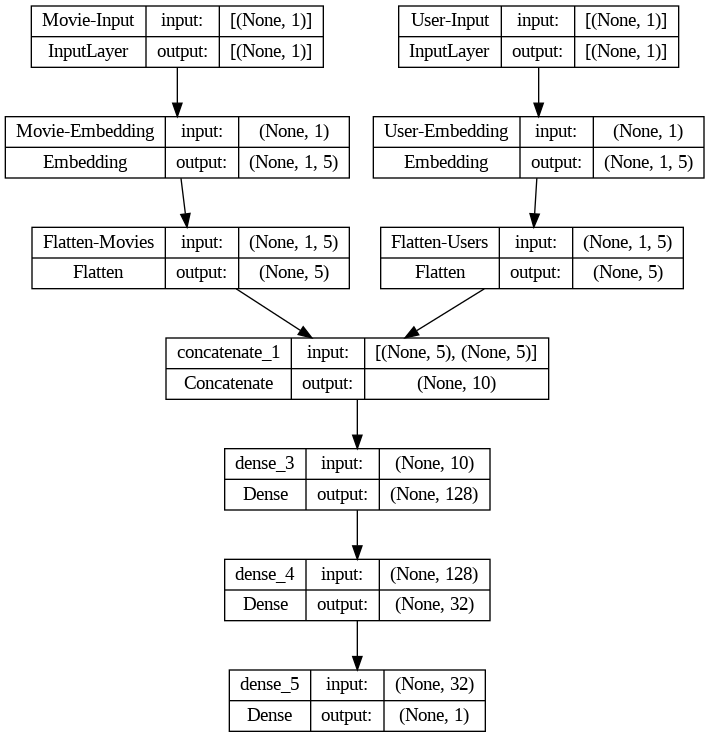

In [57]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [58]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Movie-Input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 User-Input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 Movie-Embedding (Embedding  (None, 1, 5)                 8415      ['Movie-Input[0][0]']         
 )                                                                                                
                                                                                                  
 User-Embedding (Embedding)  (None, 1, 5)                 4720      ['User-Input[0][0]']    

In [59]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=3, restore_best_weights = True)

In [60]:
#history = model.fit([train.user_id, train.item_id], train.rating, epochs=200, validation_data=([val.user_id, val.user_id], val.rating), verbose=1, callbacks=[early_stop])
history = model.fit([train.user_id, train.item_id], train.rating, batch_size=100, epochs=10, verbose=1, callbacks=[early_stop])

Epoch 1/10
800/800 [==============================] - 6s 6ms/step - loss: 1.6384 - root_mean_squared_error: 1.2800
Epoch 2/10
800/800 [==============================] - 7s 8ms/step - loss: 0.8836 - root_mean_squared_error: 0.9400
Epoch 3/10
800/800 [==============================] - 5s 6ms/step - loss: 0.8700 - root_mean_squared_error: 0.9328
Epoch 4/10
800/800 [==============================] - 4s 5ms/step - loss: 0.8623 - root_mean_squared_error: 0.9286
Epoch 5/10
800/800 [==============================] - 5s 7ms/step - loss: 0.8469 - root_mean_squared_error: 0.9203
Epoch 6/10
800/800 [==============================] - 6s 7ms/step - loss: 0.8310 - root_mean_squared_error: 0.9116
Epoch 7/10
800/800 [==============================] - 4s 4ms/step - loss: 0.8212 - root_mean_squared_error: 0.9062
Epoch 8/10
800/800 [==============================] - 3s 4ms/step - loss: 0.8086 - root_mean_squared_error: 0.8992
Epoch 9/10
800/800 [==============================] - 2s 3ms/step - loss: 0.7974

In [61]:
import plotly.graph_objects as go

# Plot the root mean squared error over epochs
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=list(range(len(history.history['root_mean_squared_error']))),
                          y=history.history['root_mean_squared_error'],
                          mode='lines',
                          name='Train'))
fig1.update_layout(title='Model root_mean_squared_error',
                   xaxis_title='Epoch',
                   yaxis_title='root_mean_squared_error')
fig1.show()

# Plot the training loss over epochs
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=list(range(len(history.history['loss']))),
                          y=history.history['loss'],
                          mode='lines',
                          name='Train'))
fig2.update_layout(title='Model loss',
                   xaxis_title='Epoch',
                   yaxis_title='Loss')
fig2.show()

In [62]:
model.save("/content/drive/MyDrive/swm_project_models/model1_")

In [63]:
model = keras.models.load_model("/content/drive/MyDrive/swm_project_models/model1_")


In [64]:
test_loss, test_accuracy = model.evaluate([test.user_id, test.item_id], test.rating)

625/625 [==============================] - 1s 2ms/step - loss: 0.8591 - root_mean_squared_error: 0.9269


In [65]:
test_loss

0.8590510487556458

In [66]:
test_accuracy

0.9268500804901123

In [67]:
predictions = model.predict([test.user_id, test.item_id])

625/625 [==============================] - 2s 2ms/step


In [68]:
predictions

array([[3.6499848],
       [3.820568 ],
       [3.2487817],
       ...,
       [3.8087277],
       [3.846941 ],
       [3.1121721]], dtype=float32)

In [69]:
for i in range(0,10):
  print(predictions[i], test.rating.iloc[i])

[3.6499848] 4
[3.820568] 3
[3.2487817] 4
[3.1483526] 2
[4.1861033] 2
[3.3076644] 3
[3.806387] 5
[4.0244985] 4
[3.3274634] 3
[3.0686512] 4


In [70]:
import pandas as pd

# load movies dataset
movies_df = pd.read_csv('/content/drive/MyDrive/MyDrive/movies.csv')

# create movies dictionary
movies_dict = {}
for row in movies_df.itertuples():
    movies_dict[row[1]] = row[2]

# print movies dictionary
print(movies_dict)

{1: 'Toy Story (1995)', 2: 'Jumanji (1995)', 3: 'Grumpier Old Men (1995)', 4: 'Waiting to Exhale (1995)', 5: 'Father of the Bride Part II (1995)', 6: 'Heat (1995)', 7: 'Sabrina (1995)', 8: 'Tom and Huck (1995)', 9: 'Sudden Death (1995)', 10: 'GoldenEye (1995)', 11: 'American President, The (1995)', 12: 'Dracula: Dead and Loving It (1995)', 13: 'Balto (1995)', 14: 'Nixon (1995)', 15: 'Cutthroat Island (1995)', 16: 'Casino (1995)', 17: 'Sense and Sensibility (1995)', 18: 'Four Rooms (1995)', 19: 'Ace Ventura: When Nature Calls (1995)', 20: 'Money Train (1995)', 21: 'Get Shorty (1995)', 22: 'Copycat (1995)', 23: 'Assassins (1995)', 24: 'Powder (1995)', 25: 'Leaving Las Vegas (1995)', 26: 'Othello (1995)', 27: 'Now and Then (1995)', 28: 'Persuasion (1995)', 29: 'City of Lost Children, The (Cité des enfants perdus, La) (1995)', 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)', 31: 'Dangerous Minds (1995)', 32: 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)', 34: 'Babe (1995)', 35: 'Ca

In [120]:
movies_dict[814]

KeyError: 814

RECOMMENDATION OF MOVIES FOR A GIVEN USER

In [122]:
dataset['user_id'].value_counts()
def is_new_user(user_id):
  if user_id in dataset['user_id'].value_counts():
    return False
  return True

In [121]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Define input widgets
user_id = widgets.IntText(
    value=1,
    description='User ID:',
    disabled=False
)

top_movies_count = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description='Number of Recommendations:'
)

# Define function to predict movie ratings
def predict_ratings(user_id):
    movie_list = np.array(list(range(1, 1683)))
    user_list = np.array([user_id] * len(movie_list))
    predictions = model.predict([user_list, movie_list])
    return predictions

# Define function to recommend top movies
def recommend_movies_for_existing_user(user_id, n=10):
    predictions = predict_ratings(user_id)
    top_movies = pd.DataFrame({'Movie ID': list(range(1, 1683)), 'Predicted Rating': predictions.flatten()})
    top_movies = top_movies.sort_values(by='Predicted Rating', ascending=False).head(n)
    top_movies = top_movies.reset_index(drop=True)
    top_movies['Movie Names'] = top_movies['Movie ID'].map(movies_dict)
    return top_movies

def recommend_movies_for_new_user(user_id, n=10):
    movie_ratings = dataset.groupby('item_id').agg({'rating': 'mean'}).reset_index()
    movie_ratings = movie_ratings.rename(columns={'rating': 'Predicted Rating'})
    top_movies = movie_ratings.sort_values(by='Predicted Rating', ascending=False).head(2*n)
    top_movies = top_movies.sample(frac=1).reset_index(drop=True)
    top_movies['Movie Names'] = top_movies['item_id'].map(movies_dict)
    top_movies.dropna(subset=['Movie Names'], inplace=True)
    movie_ratings = movie_ratings.rename(columns={'item_id': 'Movie ID'})
    return top_movies.head(n)

# Define function to handle button click
def on_button_click(b):
    user_id_value = user_id.value
    recommended_movies = pd.DataFrame()
    if not is_new_user(user_id_value):
      recommended_movies = recommend_movies_for_existing_user(user_id_value, top_movies_count.value)
    else:
      recommended_movies = recommend_movies_for_new_user(user_id_value, top_movies_count.value)
    print("Recommended Movies for User ID:", user_id_value)
    display(recommended_movies)

# Load saved model
model = keras.models.load_model("/content/drive/MyDrive/swm_project_models/model1_")

# Define UI layout
user_input_box = widgets.HBox([user_id, top_movies_count])
button = widgets.Button(description='Recommend Movies', button_style='info')
button.on_click(on_button_click)
ui = widgets.VBox([widgets.Label('Movie Recommendation System'), user_input_box, button])

# Display UI
display(ui)

<class 'int'>
53/53 [==============================] - 0s 2ms/step
Recommended Movies for User ID: 1


,Movie ID,Predicted Rating,Movie Names
0,1449,5.065893,Waiting for Guffman (1996)
1,850,4.978905,Cyclo (Xich lo) (1995)
2,1398,4.967036,In Love and War (1996)
3,408,4.947665,8 Seconds (1994)
4,474,4.945327,In the Line of Fire (1993)


<class 'int'>
Recommended Movies for User ID: 1000


,item_id,Predicted Rating,Movie Names
0,1653,5.0,Gattaca (1997)
2,1189,5.0,"Thin Blue Line, The (1988)"
3,1201,5.0,"Good, the Bad and the Ugly, The (Buono, il bru..."
5,1293,5.0,Gandhi (1982)
6,1599,5.0,Steel (1997)


<class 'int'>
Recommended Movies for User ID: 1000


,item_id,Predicted Rating,Movie Names
0,1653,5.0,Gattaca (1997)
1,1500,5.0,Grosse Pointe Blank (1997)
4,1201,5.0,"Good, the Bad and the Ugly, The (Buono, il bru..."
5,1293,5.0,Gandhi (1982)
8,1189,5.0,"Thin Blue Line, The (1988)"


In [ ]:
import plotly.express as px

# Distribution of ratings
rating_distribution = dataset['rating'].value_counts().reset_index()
rating_distribution.columns = ['Rating', 'Count']
fig = px.bar(rating_distribution, x='Rating', y='Count', title='Distribution of Ratings')
fig.update_layout(xaxis_title='Rating', yaxis_title='Count')
fig.show()

# Distribution of ratings in train and test sets
train_rating_distribution = train['rating'].value_counts().reset_index()
train_rating_distribution.columns = ['Rating', 'Count']
fig = px.bar(train_rating_distribution, x='Rating', y='Count', title='Distribution of Ratings in Train Set')
fig.update_layout(xaxis_title='Rating', yaxis_title='Count')
fig.show()

test_rating_distribution = test['rating'].value_counts().reset_index()
test_rating_distribution.columns = ['Rating', 'Count']
fig = px.bar(test_rating_distribution, x='Rating', y='Count', title='Distribution of Ratings in Test Set')
fig.update_layout(xaxis_title='Rating', yaxis_title='Count')
fig.show()

# Number of ratings per user
user_rating_counts = dataset['user_id'].value_counts().reset_index()
user_rating_counts.columns = ['User ID', 'Count']
fig = px.histogram(user_rating_counts, x='User ID', y='Count', title='Number of Ratings per User', nbins=50)
fig.update_layout(xaxis_title='User ID', yaxis_title='Count')
fig.show()

# Number of ratings per item
item_rating_counts = dataset['item_id'].value_counts().reset_index()
item_rating_counts.columns = ['Item ID', 'Count']
fig = px.histogram(item_rating_counts, x='Item ID', y='Count', title='Number of Ratings per Item', nbins=50)
fig.update_layout(xaxis_title='Item ID', yaxis_title='Count')
fig.show()

In [ ]:
# Get the embeddings for movies
movie_embeddings = model.get_layer("Movie-Embedding").get_weights()[0]
# Get the embeddings for users
user_embeddings = model.get_layer("User-Embedding").get_weights()[0]

In [ ]:
print(movie_embeddings.shape)
print(user_embeddings.shape)

(1683, 5)
(944, 5)


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Extract movie embeddings
movie_embeddings = model.get_layer('Movie-Embedding').get_weights()[0]

# Initialize the KNN model with cosine similarity
knn_model = NearestNeighbors(n_neighbors=10, metric='cosine')
knn_model.fit(movie_embeddings)

# Get similar movies
query_movie = 100 # Change to the desired movie id
_, indices = knn_model.kneighbors(movie_embeddings[query_movie].reshape(1, -1))
similar_movies = indices.flatten().tolist()

In [ ]:
similar_movies

[100, 127, 484, 189, 443, 511, 60, 1306, 30, 1450]

RECOMMENDATION OF MOVIES FOR A GIVEN MOVIE

In [ ]:
# import necessary libraries
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Define input widgets
movie_id = widgets.IntText(
    value=1,
    description='Enter Movie ID:',
    disabled=False
)

top_movies_count = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description='Number of Recommendations:'
)

# Define function to recommend top movies
def recommend_movies(movie_id, n=5):
    # Extract movie embeddings
    movie_embeddings = model.get_layer('Movie-Embedding').get_weights()[0]

    # Initialize the KNN model with cosine similarity
    knn_model = NearestNeighbors(n_neighbors=n, metric='cosine')
    knn_model.fit(movie_embeddings)

    # Get similar movies
    query_movie = movie_id
    _, indices = knn_model.kneighbors(movie_embeddings[query_movie].reshape(1, -1))
    similar_movies = indices.flatten().tolist()
    top_movies = pd.DataFrame({'Movie ID': similar_movies})

    top_movies['Movie Names'] = top_movies['Movie ID'].map(movies_dict)
    return top_movies

# Define function to handle button click
def on_button_click(b):
    movie_id_value = movie_id.value
    recommended_movies = recommend_movies(movie_id_value, top_movies_count.value)
    print("Recommended Movies for Movie ID:", movie_id_value)
    display(recommended_movies)

# Define UI layout
intro_text = widgets.HTML(value="<h2>Welcome to Movie Recommendation System</h2>")
user_input_box = widgets.HBox([movie_id, top_movies_count])
button = widgets.Button(description='Recommend Movies', button_style='info')
button.on_click(on_button_click)
ui = widgets.VBox([intro_text, user_input_box, button])

# Display UI
display(ui)

Recommended Movies for Movie ID: 100


,Movie ID,Movie Names
0,100,City Hall (1996)
1,127,NaN
2,484,Lassie (1994)
3,189,Reckless (1995)
4,443,"Endless Summer 2, The (1994)"


RECOMMENDATION OF MOVIES FOR A GIVEN USER AND MOVIE

In [ ]:
# import necessary libraries
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from sklearn.neighbors import NearestNeighbors

# define input widgets

user_id = widgets.IntText(
    value=1,
    description='User ID:',
    disabled=False
)

movie_id = widgets.IntText(
    value=1,
    description='Movie ID:',
    disabled=False
)

top_movies_count = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description='Num of Recs: '
)

# load saved model
model = keras.models.load_model("/content/drive/MyDrive/swm_project_models/model1_")

# define function to predict movie ratings
def predict_ratings(movie_id):
    movie_list = np.array(list(range(1, 1683)))
    user_list = np.array([movie_id] * len(movie_list))
    predictions = model.predict([user_list, movie_list])
    return predictions

import numpy as np

def recommend_similar_movies_user(user_embedding, liked_movie_embedding, movie_embeddings, movie_names, n=10):
    # Calculate cosine similarity between the user embedding and all movie embeddings
    user_similarities = np.dot(movie_embeddings, user_embedding) / (np.linalg.norm(movie_embeddings, axis=1) * np.linalg.norm(user_embedding))

    # Calculate cosine similarity between the liked movie embedding and all movie embeddings
    movie_similarities = np.dot(movie_embeddings, liked_movie_embedding) / (np.linalg.norm(movie_embeddings, axis=1) * np.linalg.norm(liked_movie_embedding))

    # Combine the two similarity scores using a weighted sum
    combined_similarities = 0.5 * user_similarities + 0.5 * movie_similarities

    # Get the indices of the top n movies with highest similarity
    top_indices = np.argsort(-combined_similarities)[:n]

    # Get the names of the recommended movies
    recommended_movies = [movie_names[i] for i in top_indices]

    return top_indices

# define function to recommend top movies
def recommend_movies(user_id, movie_id, n=5):
   ### predictions = predict_ratings(user_id)
    # Extract movie embeddings
    movie_embeddings = model.get_layer('Movie-Embedding').get_weights()[0]
    user_embeddings = model.get_layer("User-Embedding").get_weights()[0]
    similar_movies = recommend_similar_movies_user(user_embeddings[user_id], movie_embeddings[movie_id], movie_embeddings, list(movies_dict.values()), n)
    top_movies = pd.DataFrame({'Movie ID': list(similar_movies)})

    top_movies['Movie Names'] = top_movies['Movie ID'].map(movies_dict)
    return top_movies

# define function to handle button click
def on_button_click(b):
    user_id_value = user_id.value
    movie_id_value = movie_id.value
    recommended_movies = recommend_movies(user_id_value, movie_id.value, top_movies_count.value )
    print("Recommended Movies for User ID:",user_id_value, "and movie ID:",movie_id_value)
    display(recommended_movies)

# define UI layout
ui = widgets.VBox([user_id, movie_id, top_movies_count , widgets.Button(description='Recommend Movies', button_style='info')])

# link button click to on_button_click function
ui.children[3].on_click(on_button_click)

# display UI
display(ui)


Recommended Movies for User ID: 10 and movie ID: 100


,Movie ID,Movie Names
0,751,NaN
1,327,Tank Girl (1995)
2,1668,One Night Stand (1997)
3,25,Leaving Las Vegas (1995)
4,4,Waiting to Exhale (1995)


Recommended Movies for User ID: 10 and movie ID: 50


,Movie ID,Movie Names
0,230,Dolores Claiborne (1995)
1,1523,"Truth or Consequences, N.M. (1997)"
2,88,Black Sheep (1996)
3,697,Feeling Minnesota (1996)
4,1627,U Turn (1997)
